# 1.Problem statement: Download the data from the file data source and provide possible data insights.

## Data set reference link: https://www.consumerfinance.gov/data-
## research/consumer-complaints/#download-the-data
## File data source: https://files.consumerfinance.gov/ccdb/complaints.csv.zip


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv(r"C:\Users\PRAKASH\Downloads\complaints.csv\complaints.csv", low_memory=False)
df1.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2024-01-24,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,NaN,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",FL,33578,NaN,Consent not provided,Web,2024-01-24,Closed with explanation,Yes,NaN,8205544
1,2024-02-26,Debt collection,Other debt,Threatened to contact someone or share informa...,Talked to a third-party about your debt,NaN,NaN,"Marlette Funding, LLC",IL,60060,NaN,Consent not provided,Web,2024-02-26,Closed with explanation,Yes,NaN,8424268
2,2024-02-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,Company believes it acted appropriately as aut...,"CCS Financial Services, Inc.",NC,27536,NaN,Consent not provided,Web,2024-02-26,Closed with non-monetary relief,Yes,NaN,8423775
3,2024-02-20,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Reporting company used your report improperly,I am disappointed to have received a credit re...,NaN,LEXISNEXIS,CA,94124,NaN,Consent provided,Web,2024-02-20,Closed with explanation,Yes,NaN,8379830
4,2024-01-26,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"The companies, along with the credit reporting...",NaN,"EQUIFAX, INC.",NC,28804,NaN,Consent provided,Web,2024-01-26,Closed with non-monetary relief,Yes,NaN,8232435


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5167782 entries, 0 to 5167781
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 709.

In [4]:
df1.isnull().sum()

Date received                         0
Product                               0
Sub-product                      235292
Issue                                 2
Sub-issue                        735101
Consumer complaint narrative    3351574
Company public response         2693192
Company                               0
State                             45611
ZIP code                          30225
Tags                            4684932
Consumer consent provided?      1026812
Submitted via                         0
Date sent to company                  0
Company response to consumer         14
Timely response?                      0
Consumer disputed?              4399466
Complaint ID                          0
dtype: int64

In [5]:
df1.nunique()

Date received                      4539
Product                              21
Sub-product                          86
Issue                               178
Sub-issue                           272
Consumer complaint narrative    1480084
Company public response              11
Company                            7204
State                                63
ZIP code                          33632
Tags                                  3
Consumer consent provided?            4
Submitted via                         7
Date sent to company               4488
Company response to consumer          8
Timely response?                      2
Consumer disputed?                    2
Complaint ID                    5167782
dtype: int64

In [6]:
df1['Date received'] = pd.to_datetime(df1['Date received'])
df1['Date sent to company'] = pd.to_datetime(df1['Date sent to company'])

df1['Recieved_year'] = df1['Date received'].dt.year
df1['Forwarded_year'] = df1['Date sent to company'].dt.year

df1['date_diff'] =  df1['Date sent to company'] - df1['Date received']

### The following plot shows that about the top 10 products with most number of complains. Here the plot shows for the current year(2024) data and the past year(2023). This shows that the Credit reporting and the personal consumer reports has 84.3% in 2024 and 50.3% in the year 2023 is the highest of all the complains. We can clearly see this complain rose over 30% within a year. And in the second there is debt collection which is 31.44% in 2023 and it surprisingly decreased to 6.0% which is a great improvement on this.

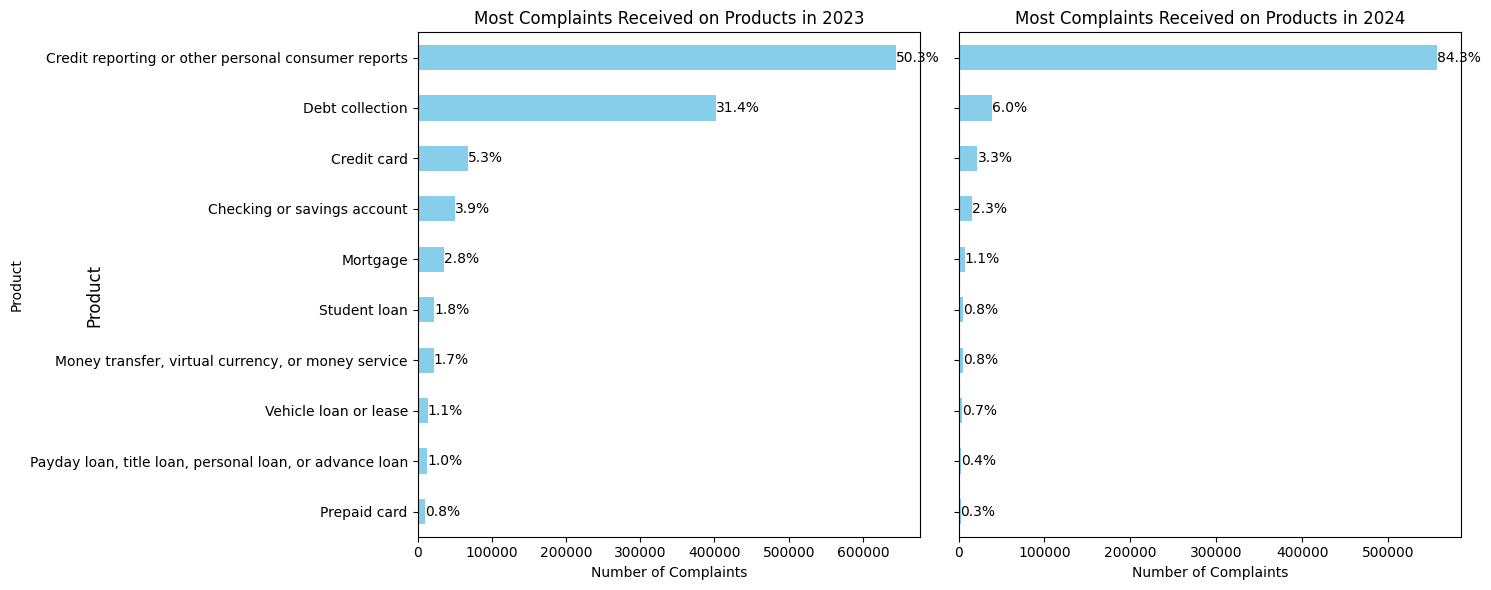

In [8]:
years = [2023, 2024]
fig, axes = plt.subplots(1, len(years), figsize=(15, 6), sharey=True)

for i, year in enumerate(years):
    df_year = df1[df1['Recieved_year'] == year]
    product_counts = df_year['Product'].value_counts().head(10)
    product_counts = product_counts.iloc[::-1]
    bars = product_counts.plot(kind='barh', color='skyblue', ax=axes[i])
    axes[i].set_title(f'Most Complaints Received on Products in {year}')

    for bar in bars.patches:
        axes[i].text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
                     f'{bar.get_width() / sum(product_counts) * 100:.1f}%',
                     ha='left', va='center', color='black')

    axes[i].set_xlabel('Number of Complaints')
    
    if i > 0:
        axes[i].set_ylabel('')
    
fig.text(0.06, 0.5, 'Product', va='center', rotation='vertical', fontsize=12)

plt.tight_layout()
plt.show()

### Here we are seeing the complaints from the special category people like servicement, older american, and those who are servicemen and older american. Older american means that they are 62 or older. I plotted a bar plot which shows that how many complains were recieved from these persons and which are the products they are complaining about. This data is a part of the data set which contains 5.1 million data records. Comparing to overall complains history over the years there is lesser complains from the special category people. You can crearly see that the highest number of complains from service member on the product debt collection was around 600 among the 5.1 million records.

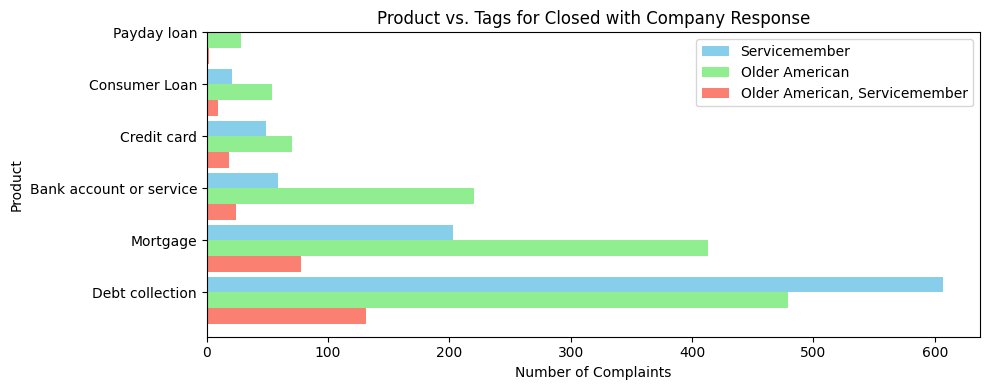

In [10]:
df_closed = df1[df1['Company response to consumer'] == 'Closed']

tag_counts = {
    'Servicemember': df_closed[df_closed['Tags'] == 'Servicemember']['Product'].value_counts(),
    'Older American': df_closed[df_closed['Tags'] == 'Older American']['Product'].value_counts(),
    'Older American, Servicemember': df_closed[df_closed['Tags'] == 'Older American, Servicemember']['Product'].value_counts()
}
colors = ['skyblue', 'lightgreen', 'salmon']
fig, ax = plt.subplots(figsize=(10, 4))

for i, (tag, counts) in enumerate(tag_counts.items()):
    counts.plot(kind='barh', label=tag, color=colors[i], width=0.3, ax=ax, position=i)

plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.title('Product vs. Tags for Closed with Company Response')
plt.legend()
plt.tight_layout()
plt.show()

### The following plot will show that the states from which more complaints recieved. I ploted the top 10 stated by the number of complaints it received. THe stats is included all the 21 product types. here also the most complains are from the category Credit reports or othe personel consumer complains. In this data the state which recieved most complaints was Florida USA with 18.30% of overall complaints.

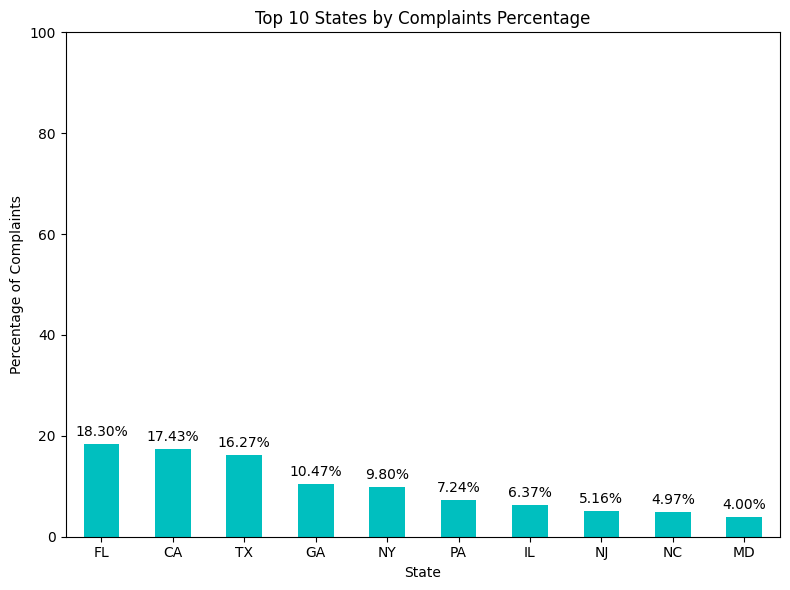

In [11]:
state_counts = df1['State'].value_counts()
sorted_states = state_counts.sort_values(ascending=False)
top_10_states = sorted_states.head(10)
percentages = (top_10_states / top_10_states.sum()) * 100

plt.figure(figsize=(8, 6))
bars = percentages.plot(kind='bar', color='c')
plt.xlabel('State')
plt.ylabel('Percentage of Complaints')
plt.title('Top 10 States by Complaints Percentage')
plt.xticks(rotation=0) 
plt.ylim(0, 100) 
plt.tight_layout()

for bar, percentage in zip(bars.patches, percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

### This plot will show what issue are the consumers facing or on which reason they raised the dispute or complaint. Here I ordered the top 10 common issues faced by the consumers on the products the consumed. Here most of the consumers facing issue with income share agreement of about 23.68%. They are frequently facing the spam issue like spammers calling and telling them they are calling on behalf of the company and they want the consumers to share the informations of the income advance fees and more. The data of these issues are shown in a bar plot.

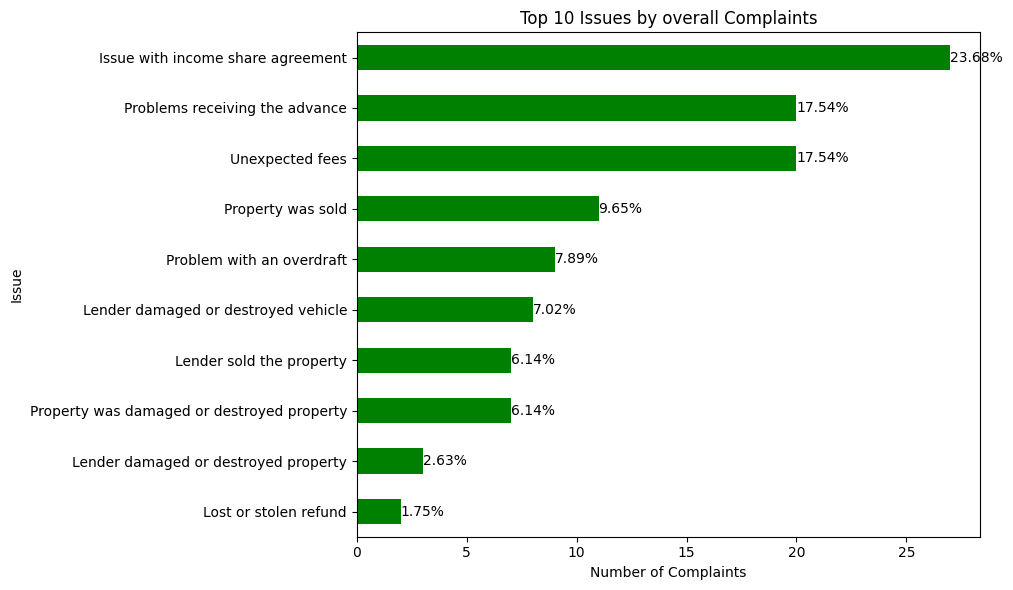

In [12]:
issue_counts = df1['Issue'].value_counts()

sorted_issues = issue_counts.sort_values(ascending=True)
top_10_issues = sorted_issues.head(10)

plt.figure(figsize=(10, 6))
bars = top_10_issues.plot(kind='barh', color='g')
plt.xlabel('Number of Complaints')
plt.ylabel('Issue')
plt.title('Top 10 Issues by overall Complaints')
plt.tight_layout()

for bar in bars.patches:
    percentage = bar.get_width() / sum(top_10_issues) * 100
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', ha='left', va='center')

plt.show()


### This following plot will show how the consumers are registering their ccomplains or in which way the registering their issue the most. in thi plot we can clearly see that the majority of the consumers raising their disputes over the web likely 89.3% of people.

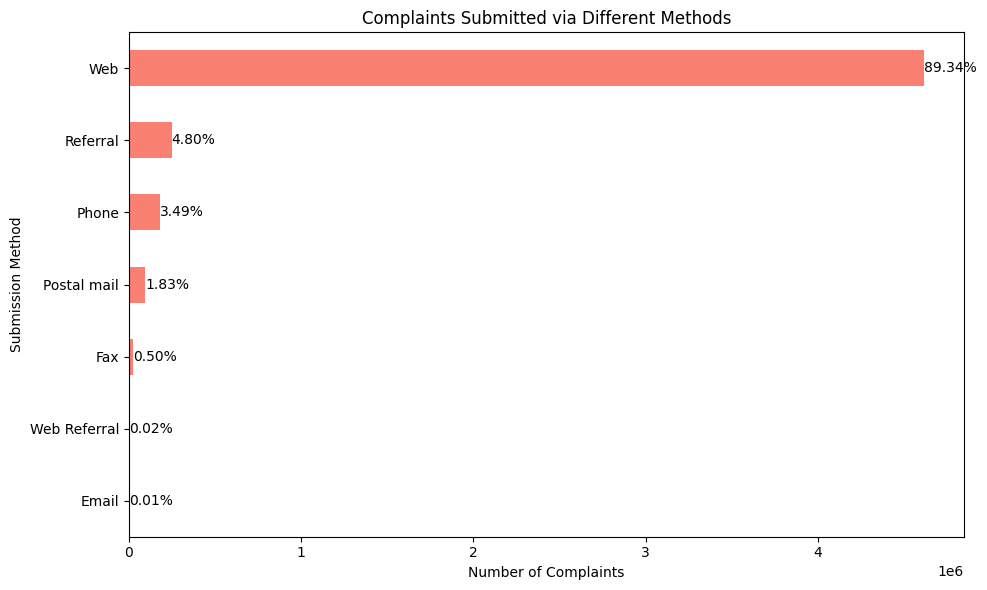

In [13]:
submission_counts = df1['Submitted via'].value_counts().iloc[::-1]

plt.figure(figsize=(10, 6))
bars = submission_counts.plot(kind='barh', color='salmon')
plt.xlabel('Number of Complaints')
plt.ylabel('Submission Method')
plt.title('Complaints Submitted via Different Methods')

for bar in bars.patches:
    percentage = bar.get_width() / len(df1) * 100
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', ha='left', va='center')

plt.tight_layout()
plt.show()

### The following scatter plot can show how long it will be taken for the complaints to be transfered to the consent companies. Here most of the complains are transfered to the concerned companies within a day to a month. And then there are some complaints which transfred after 3.5 years from the date of the complaint is registered. This shows the lack of dealing with the complaints in immediate basis.

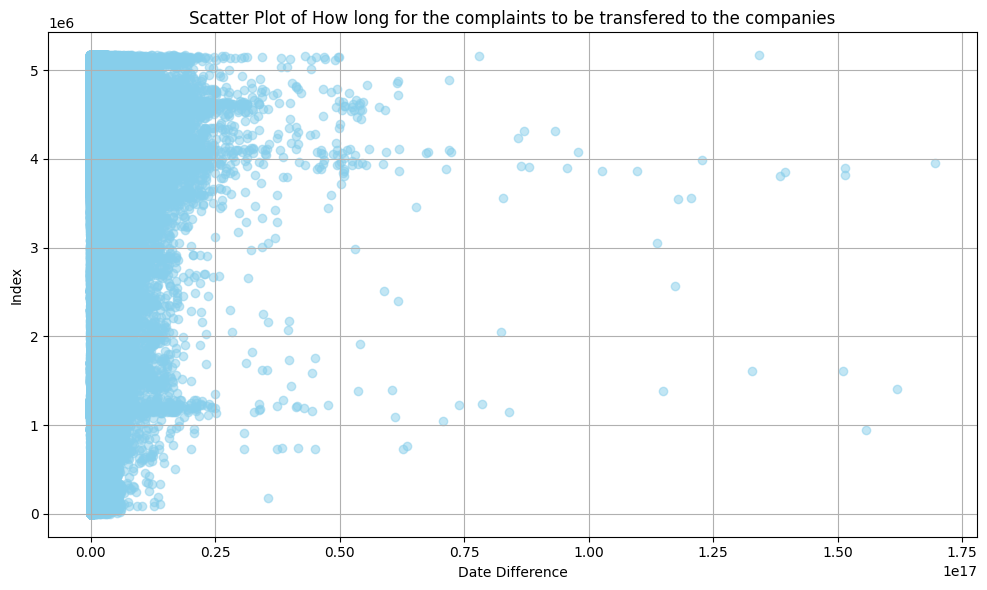

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df1['date_diff'], df1.index, color='skyblue', alpha=0.5)
plt.xlabel('Date Difference')
plt.ylabel('Index')
plt.title('Scatter Plot of How long for the complaints to be transfered to the companies')
plt.grid(True)
plt.tight_layout()
plt.show()

### Following the above plot here it is a plot which representing the same kind representation which shows the timely response to the complaints. By seeing the above plot moost of the complains are responded within a day likely in this plot there is lesser amount of complains which is not timely responded. Mostly Debt collection was not timely responded in the below plot. The ratio is likely 99:1 for timely responded or not.

C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_21480\3498578948.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x800 with 0 Axes>

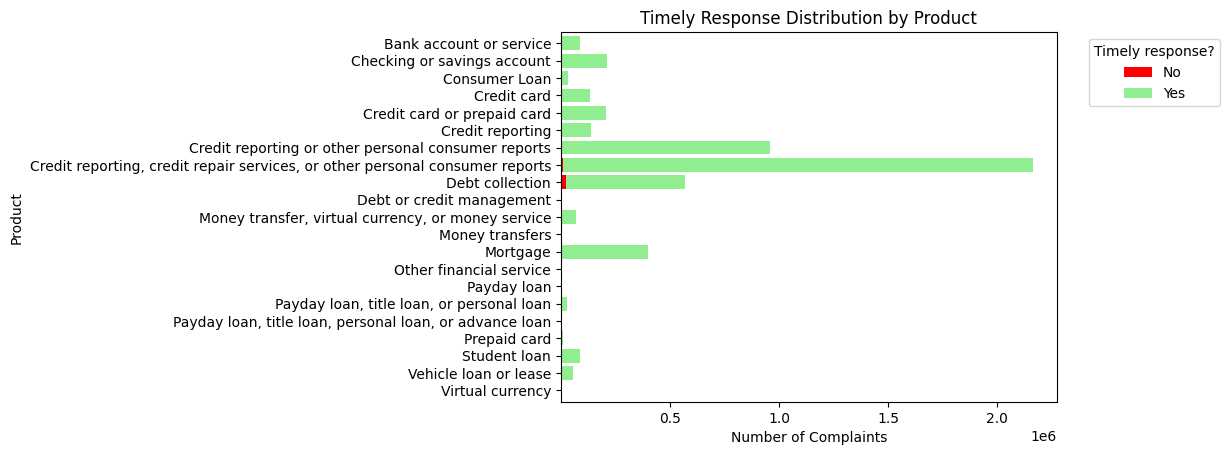

In [19]:
grouped = df1.groupby(['Product', 'Timely response?']).size().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
grouped[::-1].plot(kind='barh', stacked=True, color=['r', 'lightgreen'], width=0.8)
plt.xlabel('Number of Complaints')
plt.ylabel('Product')
plt.title('Timely Response Distribution by Product')
plt.legend(title='Timely response?', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### This plot will show wether the consumer is provided with a consent or not. The importand work of consumer service representative is to timely respond to the consumers and clear their disputes. Here this shows that the consumers are not provided with a consent is higher then the constomers with the consents provided. Without the consents the service representatives will not know that the consumers are satisfied with the response or not. The customers who doen not provided their concents are nearly 50% on the overall complains recieved.

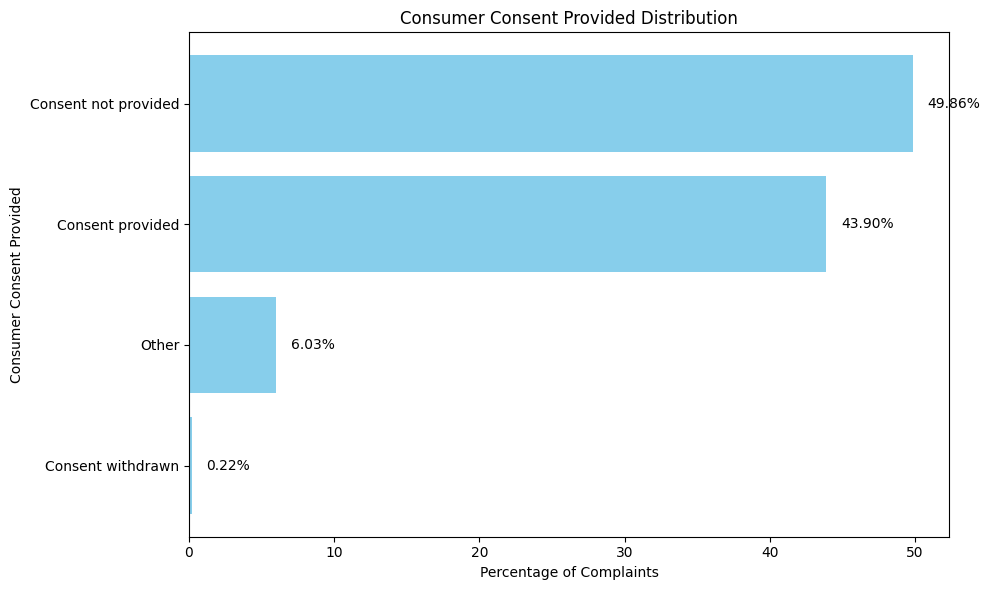

In [21]:
consent_counts = df1['Consumer consent provided?'].value_counts().iloc[::-1]

total_complaints = consent_counts.sum()
percentages = (consent_counts / total_complaints) * 100
plt.figure(figsize=(10, 6))
bars = plt.barh(percentages.index, percentages, color='skyblue')

for bar, percentage in zip(bars, percentages):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{percentage:.2f}%', 
             ha='left', va='center', color='black')

plt.xlabel('Percentage of Complaints')
plt.ylabel('Consumer Consent Provided')
plt.title('Consumer Consent Provided Distribution')
plt.tight_layout()
plt.show()

### This plot will show how the companies are responded to certain complains in which way. This is shown in a stacked barplot ordered by the legent given in the top right corner. There is the most response from the company was that company has responded to consumer and CFPB and not to provide a public response. This plot also shows that which way the company has responded to complains the most. It is almost 90% of the complains or responded with 'company has responded to consumer and CFPB and not to provide a public response'.

C:\Users\PRAKASH\AppData\Local\Temp\ipykernel_21480\3147284214.py:9: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


<Figure size 1200x1000 with 0 Axes>

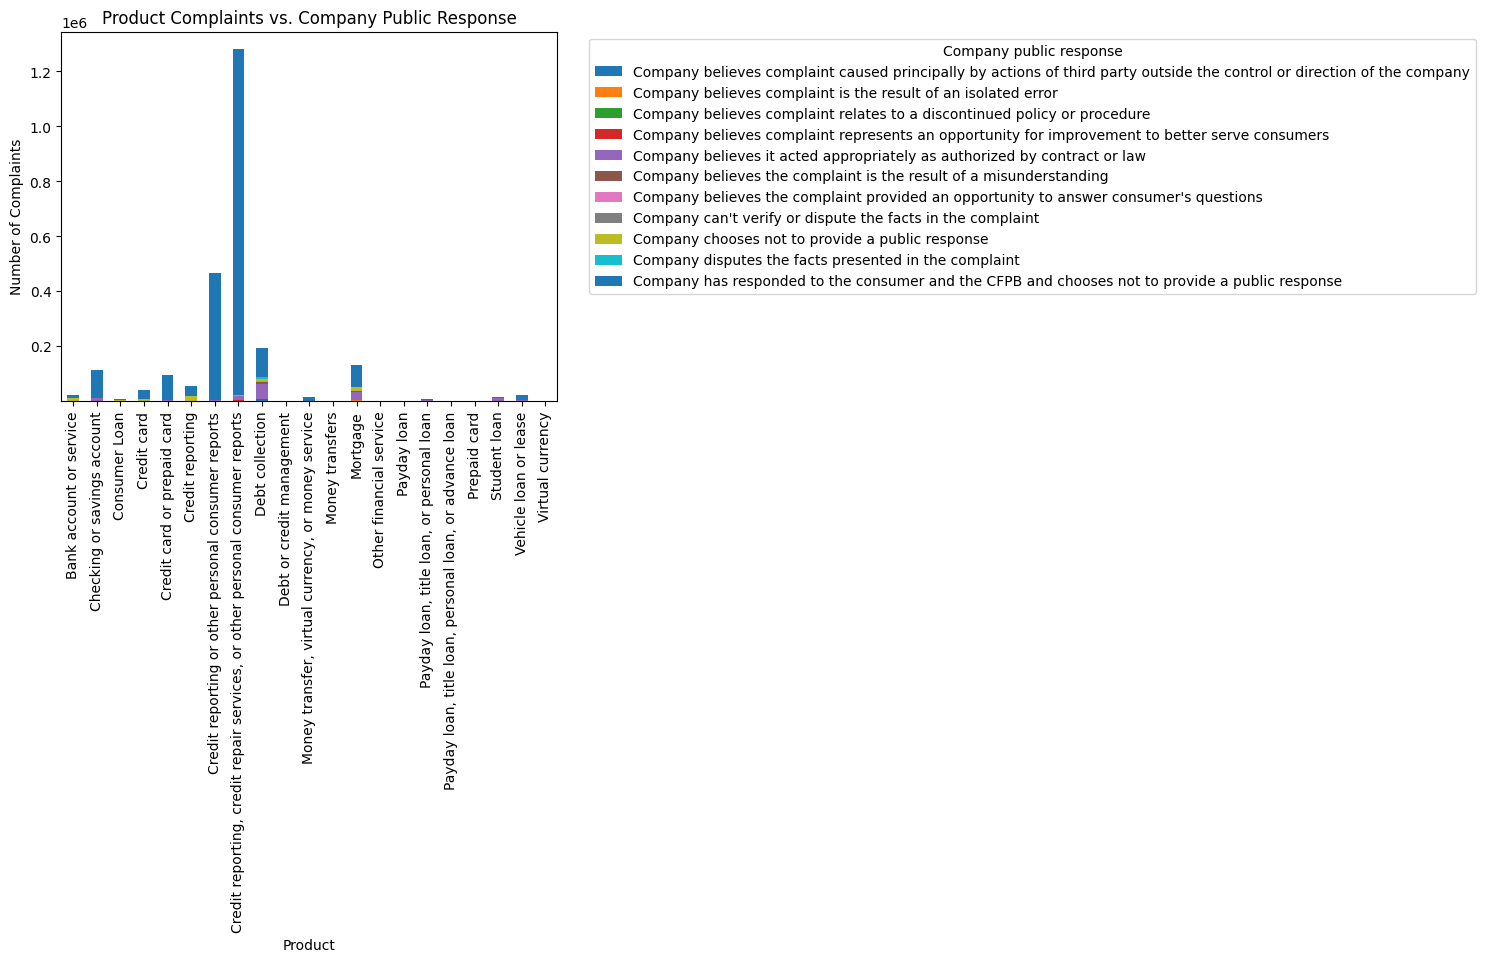

In [22]:
product_response_counts = df1.groupby(['Product', 'Company public response']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 10))
product_response_counts.plot(kind='bar', stacked=True)
plt.xlabel('Product')
plt.ylabel('Number of Complaints')
plt.title('Product Complaints vs. Company Public Response')
plt.legend(title='Company public response', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Conclution:

### The given data has record of complains from the consumers directed to the concern companies. The data is to be evaluated and analyzed for minimizing the complains faced by consumers. Year on year most of the conplaints are reduced massively. Very few issues gradually grows each year that only faced by the scammed. Year analisis of the data would really help the companies to reduce their consumers issues and grow their business eventually. By the analisis of the data and doing preventive precausions, The complaints are gradually decreased over the years.

-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


# 2. Given an unsorted array of integers, find the length of the longest continuous increasing subsequence (subarray). 
### Example 1:
### Input: [1,3,5,4,7]
### Output: 3 
### Example 2:
### Input: [2,2,2,2,2]
### Output: 1

In [23]:
def longest_continous_array(arr):
    max_len = 1
    current_len = 1

    for i in range(1, len(arr)):
        if arr[i] > arr[i-1]:
            current_len += 1
            max_len = max(max_len, current_len)
        else:
            current_len = 1
    return max_len

### Tests

In [25]:
lst = [1,2,3,1,5,3,2,8]
lst1 = [1,3,5,4,7]
lst2 = [1,1,1,1,1,1]

print(longest_continous_array(lst))
print(longest_continous_array(lst1))
print(longest_continous_array(lst2))

3
3
1


-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


# 3. Given a list of non negative integers, arrange them such that they form the largest number.
### Example 1:
### Input: [10,2]
### Output: 210
### Example 2:
### Input: [3,30,34,5,9]
### Output: 9534330


In [35]:
def largest_number(arr):

    def compare(x, y):
        return int(x+y) - int(y+x)
    
    arr = list(map(str, arr))

    for i in range(len(arr)):
        for j in range(i+1, len(arr)):
            if compare(arr[i], arr[j]) < 0:
                arr[i], arr[j] = arr[j], arr[i]
            
    max_num = ''.join(arr)

    return max_num


# Text
arr = [10,2]
arr1 = [3,30,34,5,9]

print(largest_number(arr))
print(largest_number(arr1))

210
9534330


-------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------


# 4. Store all the "servlet-name", and "servlet-class" to a csv file from the attached sample_json.json file using Python.

In [2]:
import json
import pandas as pd

#reading the json file
f = open(r"C:\Users\PRAKASH\Downloads\DT A1 sample_json (1) (1).json")
data = json.load(f)

data1 = []

#extracting the required data from the json file
for i in data['web-app']['servlet']:
    dict_data = dict(servlet_name = i['servlet-name'],
                     servlet_class = i['servlet-class']) 
    data1.append(dict_data)

#converting the data into a dataframe using pandas
df = pd.DataFrame(data1)

#convering the dataframe into a csv file and save it to local memory
df.to_csv('servlet.csv')
